CS3320 Lab 3. Page Rank

In this lab, you will look at the Pagerank algorithm for ranking a collection of inter-linked web pages.
The following graph depicts a set of seven pages denoted by q0 to q6. Arcs are annotated with the word that occurs in the anchor text of the corresponding link.

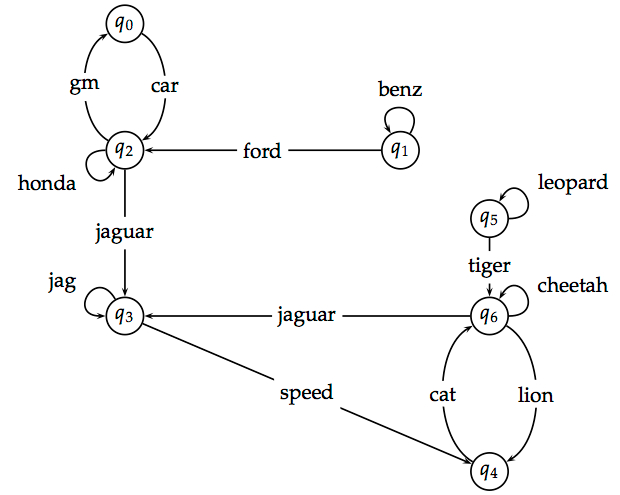

Based on the anchor text, what do you think each page is about? For example, given that the links to q3 are anchored with jag, jaguar, jaguar it is fair to assume that q3 probably refers to jaguars (either the cars or the animals).


In [2]:
from random import choice, random
from collections import Counter
import numpy as np

**The Random Surfer**

Under the random surfer model we imagine a user that is browsing the web, and at every time instance randomly clicks on a link on the current page. We can optionally assume a teleporting mechanism which teleports the user to any random page with a probability α.

Let's create set of pairs of pages, to denote the edges. The vertices and edges arrays encodes the graph provided above:

In [3]:
vertices=[0,1,2,3,4,5,6]
edges={(0,2),(1,1),(1,2),(2,0),(2,2),(2,3),(3,3),(3,4),(4,6),(5,5),(5,6),(6,6),(6,3),(6,4)}

Let's create a function called randomwalk that takes as input the set edges, a teleport probability a and a positive integer iters and performs the randomwalk. Starting from any page, the function will randomly follow links from one page to the next, teleporting to a completely random page with probability a at each iteration.

In [9]:
def randomwalk(edges,vertices,a,iters):
  x = choice(vertices)
  #print(x)
  for i in range(iters):
    if random()<a:
      # with a probability a the random walk will pick a random vertex to␣ visit (teleporting)
      x = choice(vertices)
    else:
      #otherwise it will pick at random one of the outlinks from the␣ current vertex
      x = choice([v for (u,v) in edges if u==x])
    yield x

In [10]:
X = randomwalk(edges, vertices, 0.05, 10)
next(X)

2

Now, let's create a function called generatehistogram to call the randomwalk function and store all visited states and eventually create a histogram of the frequency by which each page was visited. The generatehistogram function returns the histogram.

In [11]:
def pagerank1_generatehistogram(edges,vertices,a,iters):
  # This is a very concise way to create a histogram of the random walk sequence using a Counter object
  hist = Counter(randomwalk(edges, vertices,a, iters))
  
  # The bin counts in the histogram are normalized so that they all sum to␣one. Meaning that we can treat them as probabilities.
  return {v:hist[v]/iters for v in vertices}

We can now use the following code to sample a series of random walks of varying lengths.

In [12]:
p1 = pagerank1_generatehistogram(edges,vertices, 0.05, 10)
p2 = pagerank1_generatehistogram(edges,vertices, 0.05, 100)
p3 = pagerank1_generatehistogram(edges,vertices, 0.05, 1000)
p4 = pagerank1_generatehistogram(edges,vertices, 0.05, 10000)
p5 = pagerank1_generatehistogram(edges,vertices, 0.05, 100000)

print(p1)
print(p2)
print(p3)
print(p4)
print(p5)


{0: 0.2, 1: 0.0, 2: 0.4, 3: 0.0, 4: 0.1, 5: 0.0, 6: 0.3}
{0: 0.07, 1: 0.02, 2: 0.17, 3: 0.28, 4: 0.21, 5: 0.01, 6: 0.24}
{0: 0.044, 1: 0.009, 2: 0.077, 3: 0.246, 4: 0.253, 5: 0.011, 6: 0.36}
{0: 0.0263, 1: 0.0161, 2: 0.0584, 3: 0.2714, 4: 0.2519, 5: 0.0125, 6: 0.3634}
{0: 0.02396, 1: 0.01376, 2: 0.05241, 3: 0.27205, 4: 0.25325, 5: 0.01292, 6: 0.37165}


Let's plot to verify that the frequencies of the visits are indeed converging to a fixed probability distribution which is the “steady state visit rate”

No handles with labels found to put in legend.


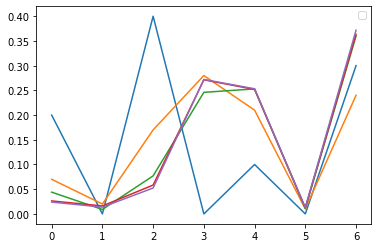

In [13]:
import matplotlib.pyplot as plt
plt.plot(vertices, [p1[p] for p in vertices])
plt.plot(vertices, [p2[p] for p in vertices])
plt.plot(vertices, [p3[p] for p in vertices])
plt.plot(vertices, [p4[p] for p in vertices])
plt.plot(vertices, [p5[p] for p in vertices])
plt.legend()

Let's create pagerank algorithm (for the data generated in last step) and create a function called pagerank that takes as input the set edges, a teleport probability a and a positive integer iters and computes the transition probability matrix. The function then starts from an arbitrary
probability vector (say one full of 1/Ns where N is the number of all states) and then multiplies this vector with the transition probability matrix iters times and returns the resulting vector

In [1]:
def pagerank2(edges,vertices, a, iters):
  N = len(vertices)
  # Creating the transition probability matrix P Initializing with zeros
  P=np.zeros((N,N))
  # teleporting matrix has 1/N in all positions (N is the number of nodes)
  Ptel=np.ones((N,N))/N
  # adding a 1 in all valid transitions in the P matrix
  for (u,v) in edges:
    P[u,v]=1
  # dividing each row with the number of outlinks, making sure each row sums to 1.
  P=P/np.expand_dims(P.sum(1),1)
  # combine the matrix with the teleport transitions according to a␣probability a
  P = (1-a)*P + a*Ptel
  # initialize a probability vector with 1/Ns
  x = np.ones(N)/N
  # Multiply it with P, a number of times equal to iters
  for i in range(iters):
    x = x@P
  # return results in the form of a dictionary from node to pagerank score
  return {i:v for (i,v) in enumerate(x.tolist())}

In [4]:
p_ = pagerank2(edges,vertices, 0.05,100)

Plotting the result of the matrix-based algorithm superimposed to the histogram with the random walk of 100,000 steps. We observe that they are in perfect agreement.

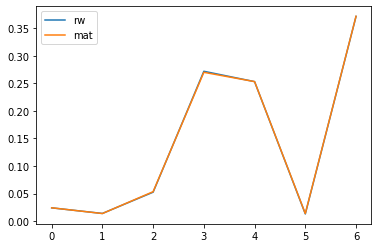

In [14]:
import matplotlib.pyplot as plt

plt.plot(vertices, [p5[p] for p in vertices], label="rw")
plt.plot(vertices, [p_[p] for p in vertices], label="mat")
plt.legend()